# Depression, Stress, and Anxiety Prediction Analysis of Twitter data

### About Dataset:

This dataset contains 20,000 English tweets that were gathered from Twitter using the Twitter API and Kaggle. These tweets have labels that indicate whether the people who posted them are feeling depressed or not. The tweets are in their original, uncleaned form, but only the English content has been kept. The main goal of this dataset is to help classify the mental health status of users based on the content of their tweets, one tweet at a time.

## Exploratory Data Analysis: Data Pre-processing

In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [18]:
df =  pd.read_csv('/Users/prajwaljayaramugowda/Downloads/Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [22]:
# Total Number of rows and columns in the DataFrame
df.shape

(20000, 11)

In [23]:
# check for missing values
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [25]:
# keep only the required columns
df = df[['post_text']]
# Display the first few rows of the modified DataFrame
print(df.head())

                                           post_text
0  It's just over 2 years since I was diagnosed w...
1  It's Sunday, I need a break, so I'm planning t...
2  Awake but tired. I need to sleep but my brain ...
3  RT @SewHQ: #Retro bears make perfect gifts and...
4  It’s hard to say whether packing lists are mak...


In [28]:
# summary statistics of the numeric columns in a DataFrame.
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [29]:
df.shape

(20000, 1)

### Text Cleaning:

Remove punctuation, numbers, stop words and convert tweets to lower case

In [32]:
# Change all characters in tweets to lowercase
df["post_text"] = df["post_text"].str.lower()

# Remove numbers from tweets
df["post_text"] = df["post_text"].apply(lambda x: re.sub(r'\d+', '', x))

# Remove punctuation from tweets
df["post_text"] = df["post_text"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#### 
Import TextBlob and NLTK (Natural Language Toolkit) which are used for natural language processing (NLP) tasks.

TextBlob provides a more user-friendly API for common NLP tasks such as sentiment analysis, part-of-speech tagging, and text classification.

NLTK provides a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, parsing, and more. It also includes a vast array of corpora and datasets for language modeling and machine learning

In [34]:
# Import NLTK (Natural Language Toolkit) for stopwords
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.0 MB/s eta 0:00:00a 0:00:01


In [35]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Define the stopwords
sw = set(stopwords.words("english"))

# Remove stopwords
df["post_text"] = df["post_text"].apply(lambda x: " ".join(word for word in x.split() if word not in sw))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prajwaljayaramugowda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatization and Word tokenization
Lemmatization is the process of reducing words to their base or dictionary form, while word tokenization is the task of splitting text into individual words or tokens for analysis.

In [36]:
from textblob import Word
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")

# Lemmatize individual words in each tweet
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prajwaljayaramugowda/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/prajwaljayaramugowda/nltk_data...


In [37]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize each word in the "post_text" column and create a new column "tokens"
df["tokens"] = df["post_text"].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prajwaljayaramugowda/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [38]:
df.head()

,post_text,tokens
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ..."
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit..."
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]"
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ..."
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li..."


## Sentiment Analysis

We're going to use TextBlob, a Python library, to perform sentiment analysis on our processed text data. The goal is to classify each tweet as either showing signs of depression or not, based on its sentiment score. Sentiment analysis is a technique that involves analyzing the emotional tone of text and automatically categorizing it as positive, negative, or neutral, depending on the words used. TextBlob uses a machine learning algorithm to give a sentiment score between -1 and +1. A score of -1 means a very negative sentiment, +1 means very positive, and 0 means neutral. By analyzing tweets with TextBlob, we can classify them as depressed or not based on their sentiment scores. For instance, a tweet with a sentiment score of -0.8 might be considered depressed, while a score of +0.5 might be seen as non-depressed.

In [41]:
# Applying sentiment to entire dataset
blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [42]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [43]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,sentiment,polarity,subjectivity
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ...",0.100000,0.100000,1.000000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,-0.093750,0.750000
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]",-0.400000,-0.400000,0.700000
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ...",0.900000,0.900000,0.875000
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li...",-0.045833,-0.045833,0.370833


In [44]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ...",0.100000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]",-0.400000
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ...",0.900000
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li...",-0.045833
5,making packing list new hobby movinghouse,"[making, packing, list, new, hobby, movinghouse]",0.136364


In [45]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

/var/folders/jr/bl481l7947x5r7_hj1dry_rr0000gn/T/ipykernel_35979/1726995722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")


,post_text,tokens,polarity,Sentiment
0,year since diagnosed anxiety depression today ...,"[year, since, diagnosed, anxiety, depression, ...",0.100000,Positive
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,Negative
2,awake tired need sleep brain idea,"[awake, tired, need, sleep, brain, idea]",-0.400000,Negative
3,rt sewhq retro bear make perfect gift great be...,"[rt, sewhq, retro, bear, make, perfect, gift, ...",0.900000,Positive
4,hard say whether packing list making life easi...,"[hard, say, whether, packing, list, making, li...",-0.045833,Negative


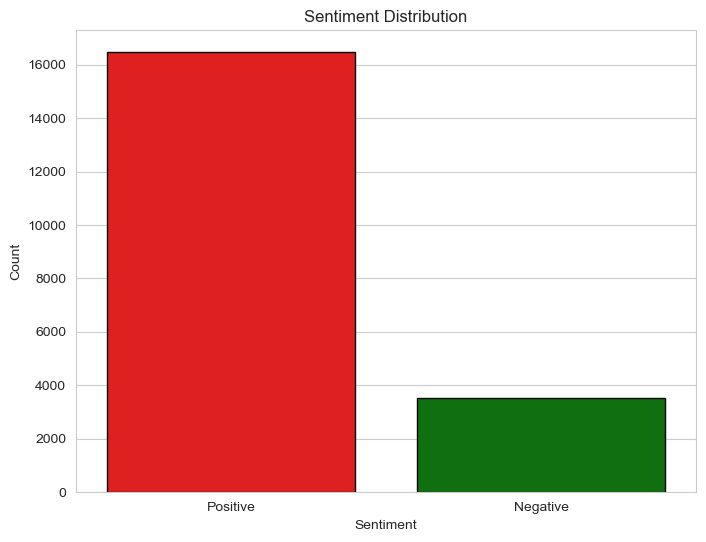

In [51]:
# Calculate sentiment value counts
result = df4["Sentiment"].value_counts()

# Set Seaborn style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=result.index, y=result.values, palette=["red", "green"], edgecolor = 'black')
plt.xticks(rotation=0)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Show the plot
plt.show()

In [47]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3540,3540,3540
Positive,16460,16460,16460


In [49]:
# returns the tweets with maximum polarity i.e. most negative tweets
df4.groupby("polarity").max().head(5) 

,post_text,tokens,Sentiment
polarity,,,
-1.000000,worst bumbling stumbling statement ive seen in...,"[worst, bumbling, stumbling, statement, ive, s...",Negative
-0.900000,sickening httpstcokoohihbrx,"[sickening, httpstcokoohihbrx]",Negative
-0.900000,keitholbermann thats one word would go traitor...,"[keitholbermann, thats, one, word, would, go, ...",Negative
-0.875000,gop lawmaker asks twitter vote whether obamaca...,"[gop, lawmaker, asks, twitter, vote, whether, ...",Negative
-0.857143,sick perceived anything everything im told dri...,"[sick, perceived, anything, everything, im, to...",Negative


### Visualize the results

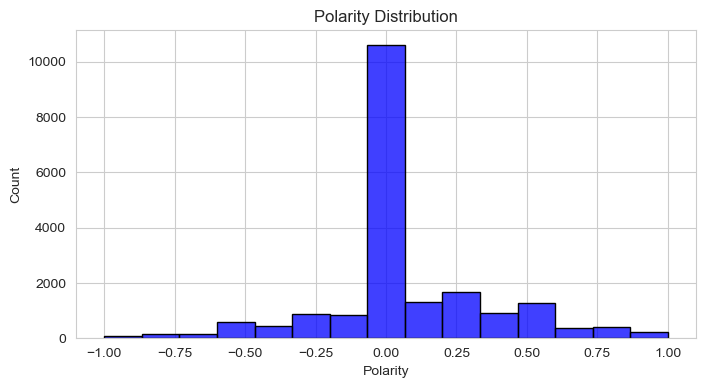

In [57]:
# Visualize distribution of polarity
plt.figure(figsize=(8, 4))
sns.histplot(df4['polarity'], bins=15, kde=False, color="blue", edgecolor = 'black')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')
plt.show()

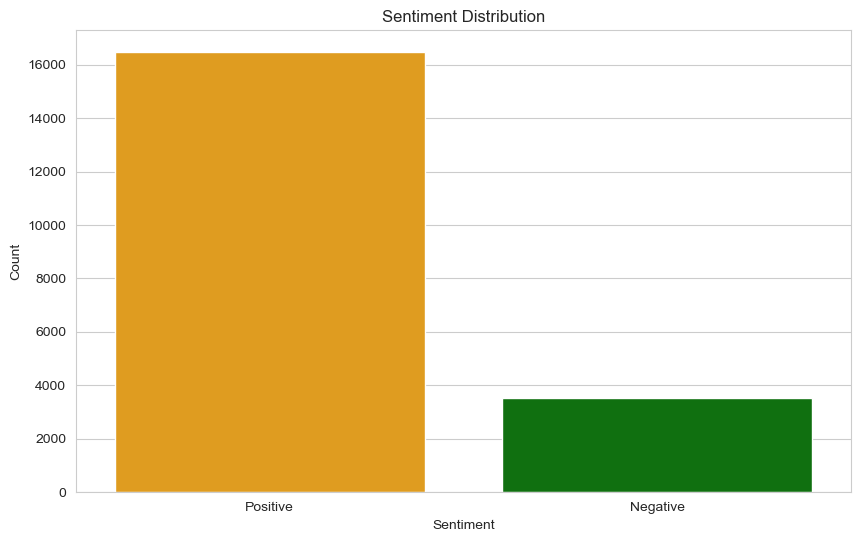

In [61]:
# Visualize distribution of sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df4, order=df4['Sentiment'].value_counts().index, palette=["orange", "green"])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

## Decision Tree
A Decision Tree is a popular machine learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences in a tree-like structure, where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents a final prediction or value. Decision Trees are interpretable, easy to visualize, and can handle both categorical and numerical data, making them valuable tools for a wide range of applications.

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [64]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [65]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.93925


In [66]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84       723
    Positive       0.97      0.95      0.96      3277

    accuracy                           0.94      4000
   macro avg       0.89      0.92      0.90      4000
weighted avg       0.94      0.94      0.94      4000



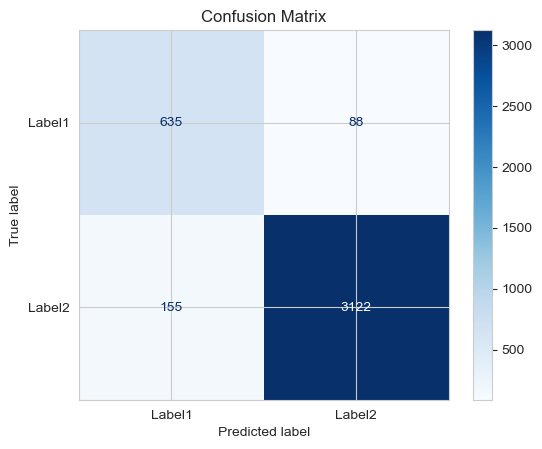

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Label1", "Label2"])
disp.plot(cmap="Blues", values_format="d")  # You can adjust the color map and format as needed
plt.title("Confusion Matrix")
plt.show()

In [69]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 93.92 %


In [70]:
# check to see if data is balanced
df4['Sentiment'].value_counts()

Sentiment
Positive    16460
Negative     3540
Name: count, dtype: int64

## Random Forest Classifier
A Random Forest Classifier is an ensemble machine learning algorithm that combines multiple decision trees to make more accurate predictions. It creates a "forest" of decision trees during training and aggregates their individual predictions to produce a final prediction. This ensemble approach improves accuracy, reduces overfitting, and is robust to noisy data, making it a versatile and widely used algorithm for classification tasks

In [71]:
# create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
# Evaluate the classifier on the testing set
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.929


In [75]:
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(rfc.predict(X_test), y_test) * 100, 2))

The accuracy of the Random Forest Classifier is 92.9


In [76]:
# Create a classification report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.79      0.82      0.81       723
    Positive       0.96      0.95      0.96      3277

    accuracy                           0.93      4000
   macro avg       0.88      0.89      0.88      4000
weighted avg       0.93      0.93      0.93      4000



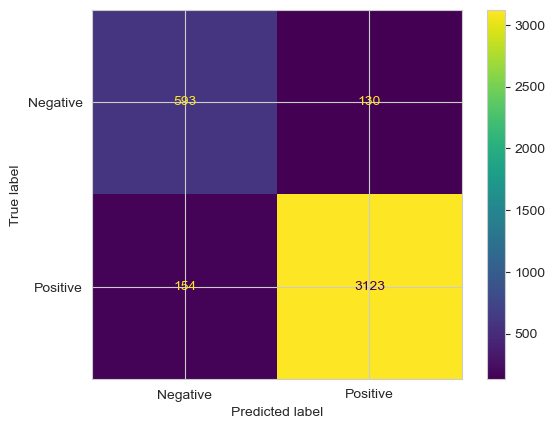

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

## KNN Classifier
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression tasks. It classifies data points by finding the majority class among their k-nearest neighbors, where "k" is a user-defined parameter. KNN relies on the principle that similar data points tend to have similar labels, making it a simple and intuitive algorithm. It's a non-parametric method, which means it doesn't make assumptions about the underlying data distribution, and it can be effective for both small and large datasets.

In [79]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.844


In [81]:
# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 84.4 %


In [82]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.18      0.30       723
    Positive       0.85      0.99      0.91      3277

    accuracy                           0.84      4000
   macro avg       0.82      0.59      0.61      4000
weighted avg       0.84      0.84      0.80      4000



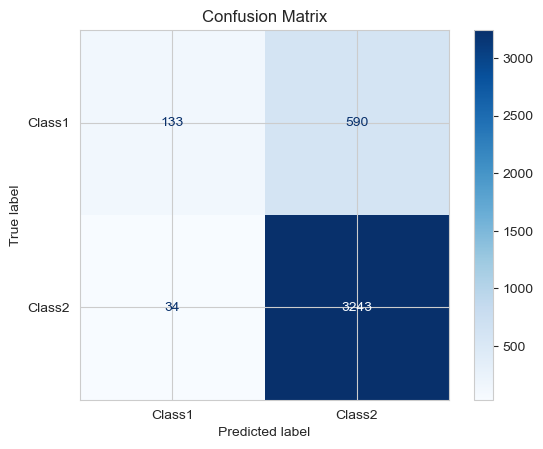

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class1", "Class2"])  # Replace "Class1" and "Class2" with your class labels
disp.plot(cmap="Blues", values_format="d")  # You can adjust the color map and format as needed
plt.title("Confusion Matrix")
plt.show()

## Naive Bayes
Naive Bayes is a family of probabilistic machine learning algorithms based on Bayes' theorem. It's particularly used for classification tasks and text analysis. Naive Bayes assumes that features are conditionally independent, making it "naive" but often surprisingly effective. It calculates the probability of a data point belonging to a particular class based on the probabilities of individual features and their relationship with the class, making it widely used for tasks like spam email detection and sentiment analysis.

In [84]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.883


In [85]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.87      0.41      0.56       723
    Positive       0.88      0.99      0.93      3277

    accuracy                           0.88      4000
   macro avg       0.88      0.70      0.75      4000
weighted avg       0.88      0.88      0.87      4000



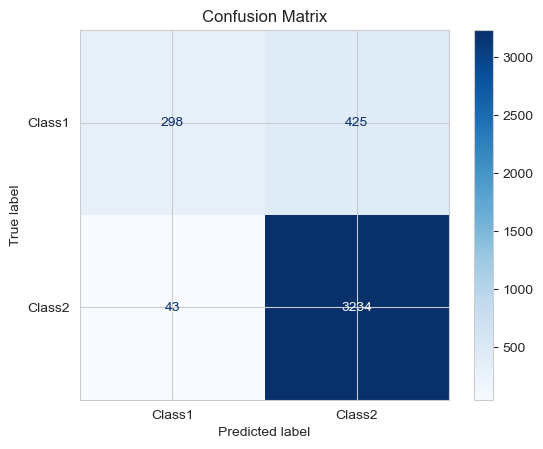

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, nb.predict(X_test))

# Create the ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class1", "Class2"])  # Replace "Class1" and "Class2" with your class labels
disp.plot(cmap="Blues", values_format="d")  # You can adjust the color map and format as needed
plt.title("Confusion Matrix")
plt.show()